# FLIGHT PRICE PREDICTION

This is the notebook for the flight price prediction project. We predict ticket prices for upcoming flights to help customers in selecting the optimum time for travel and the cheapest flight to the desired destination.
We have to analyze the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more

# Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings("ignore")

# Load the dataset

In [54]:
data=pd.read_excel('C:/Users/yaduv/Downloads/flight-fare/Flight_Fare.xlsx')

In [55]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis

**Flight fare dataset contain some features:**
- Airline: Carrier influencing price.
- Date_of_Journey: Seasonal trends.
- Source/Destination/Route: Travel route and distance.
- Duration/Stops/Arrival time/Departure time: Travel time and layovers.
- Additional_Info: Amenities included.
- Price: Target variable for prediction.

# Basic Checks

In [56]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [57]:
data.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [58]:
data.shape

(10683, 11)

In [59]:
# dataset contain 10683 rows and 11 columns

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [61]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [62]:
# there are two columns where values are null.

In [63]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [64]:
# minimum price : 1759 and maximum price : 79512

In [65]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [66]:
# all features are in object datatye except target column (Price), so we have to convert all columns in int datatype

In [67]:
data['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [68]:
# Target column contains continuous values

In [69]:
data.duplicated().sum()

220

In [70]:
data['Airline'].value_counts() # there are 12 airlines 

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [71]:
data['Source'].value_counts() # there are 5 places from where flights take off.

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [72]:
data['Destination'].value_counts() # there are 6 places where flights land.

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [73]:
data['Total_Stops'].value_counts() # there are 4 type of stops and some flights are non stop running

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [74]:
data['Additional_Info'].value_counts() # maximum info contains No info

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

**While exploring the dataset, we got to know that:**
- there are 6 features which contain object datatype: Airline,Source,Destination,Route,Total_stops,Additional_Info
- there are 4 featues which contain date and time datatype: Duration,Arrival_time,Dep_time,Date_of_Journey
- there are 2 null values in 2 columns: Route and Total_stops
- there are some duplicates values
- **So we have to convert all object datatype columns in integer datatype because ML does not accept object datatype**
- **We have to change date and time formate because ML does not accept data and time formate**
- **We have to delete all null values and duplicate values**

# Data Preprocessing

**Deleting null values and duplicated data**

In [75]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [76]:
data.dropna(inplace=True)

In [77]:
data.isnull().sum() # now all null values are clear

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [78]:
data.duplicated().sum()

220

In [79]:
data.drop_duplicates(inplace=True)

In [80]:
data.duplicated().sum() # all duplicated data are clear 

0

**Converting Date and Time formate to timestamps**

In [81]:
# converting data_of_journey column into int formate

data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.month

# Drop the original 'Date_of_Journey' column to keep the processed data

data.drop('Date_of_Journey',inplace=True,axis=1)  

data.head(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5


In [82]:
#  Extract hour and minutes from departure time and arrival time

# DEPARTURE TIME
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Mins'] = pd.to_datetime(data['Dep_Time']).dt.minute

# ARRIVAL TIME
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Mins'] = pd.to_datetime(data['Arrival_Time']).dt.minute

# Drop both the original columns to keep the processed data
data.drop('Dep_Time',axis=1,inplace=True)
data.drop('Arrival_Time',axis=1,inplace=True)

data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [83]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [84]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time
# In the duration column, we can see that there are some values that do not have minutes and some may not have hours mentioned. We have to change it to a standard " 00h : 00m " format first and then convert the string type into numerical values.

In [85]:
# Writting a function to convert duration in same formate
def add_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
    return x

In [86]:
data['Duration'].apply(add_duration)  # Apply the function on the Duration Column

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [87]:
data['Duration'] = data['Duration'].apply(add_duration)  # Update the new values into original column

data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [88]:
# Function to convert hours and minutes from string to int
# Apply function on duration column to obtain 2 new columns with int values
# Update the original dataset

data['Duration_Hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_Mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
data.drop('Duration',axis=1,inplace=True)
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [89]:
# Change the datatype of total_Stops from string to int formate
data.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [90]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25


In [92]:
data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops         int64
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Dep_Hour            int32
Dep_Mins            int32
Arrival_Hour        int32
Arrival_Mins        int32
Duration_Hours      int64
Duration_Mins       int64
dtype: object

# EDA

Text(0, 0.5, 'Airline')

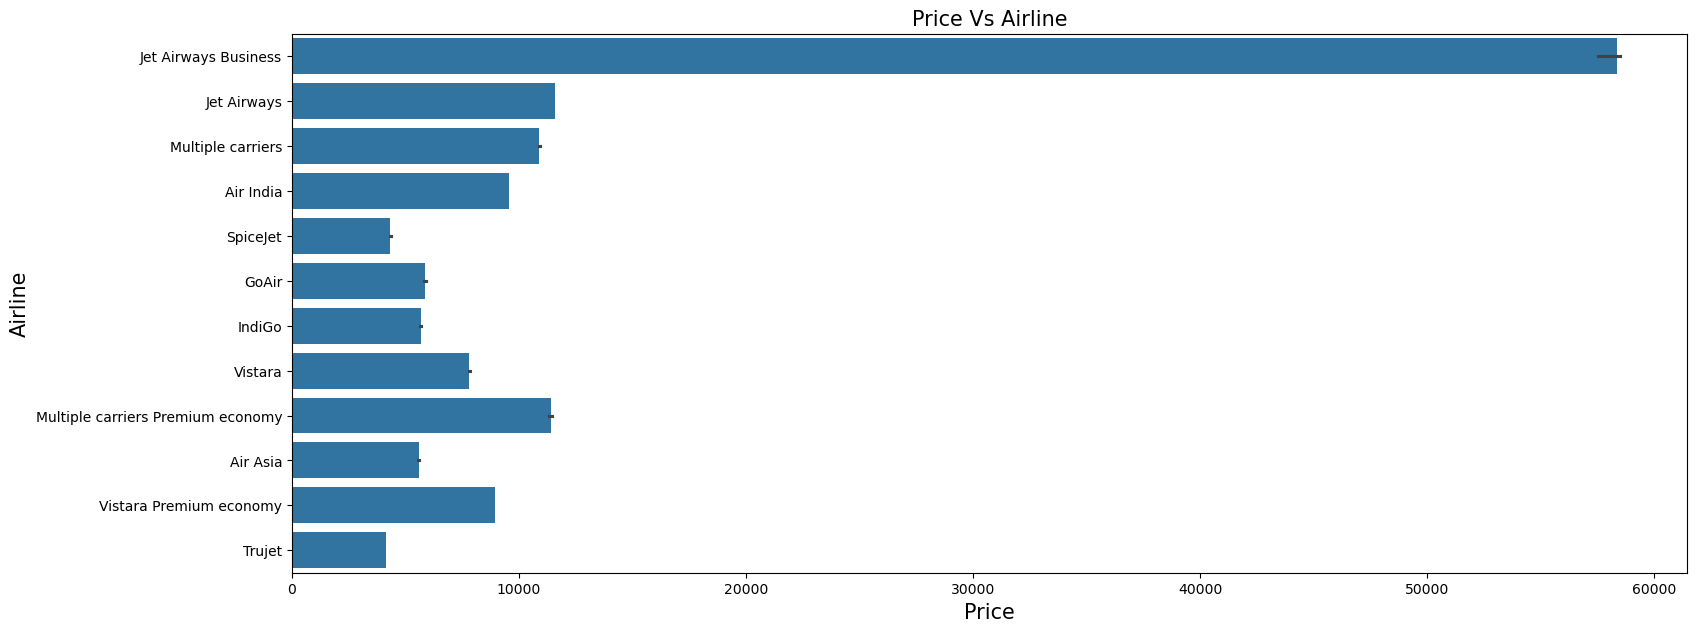

In [93]:
plt.figure(figsize=(18,7))
sns.barplot(x='Price',y='Airline',orient="h",ci=12,data=data.sort_values('Price',ascending=False))  
plt.title("Price Vs Airline",fontsize=15)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Airline",fontsize=15)

In [94]:
# Trujet Airline has lowest price whereas Jet Airways Business Airline has highest price

Text(0, 0.5, 'Price')

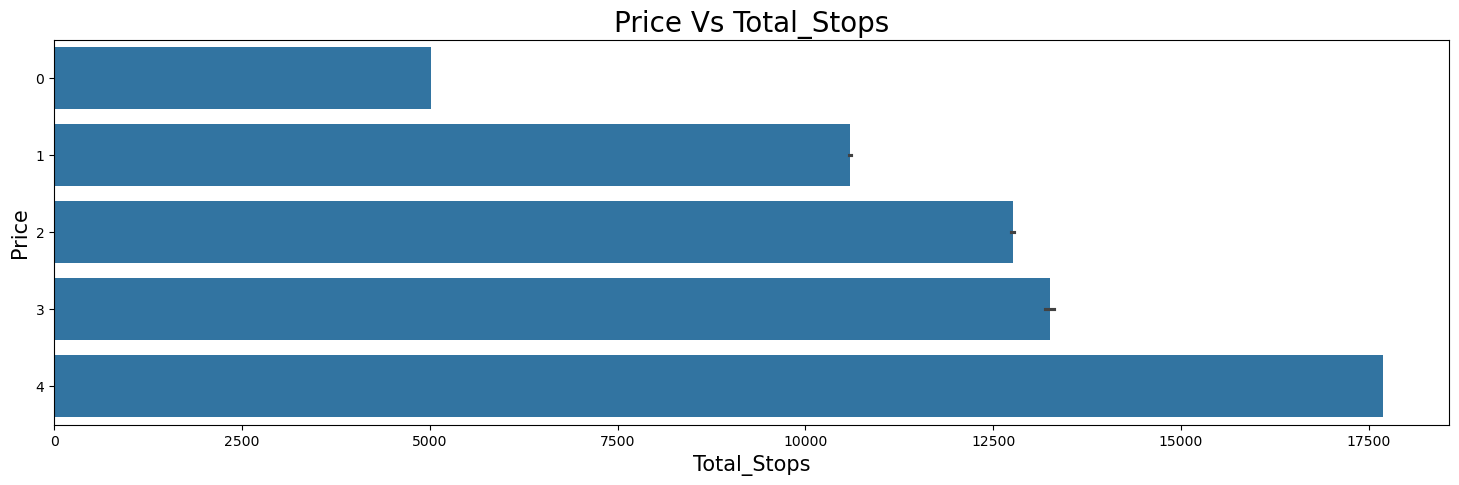

In [95]:
plt.figure(figsize=(18,5))
sns.barplot(x='Price',y='Total_Stops',orient="h",ci=12,data=data.sort_values('Price',ascending=False))  
plt.title("Price Vs Total_Stops",fontsize=20)
plt.xlabel("Total_Stops",fontsize=15)
plt.ylabel("Price",fontsize=15)

In [96]:
# As we can see Where flights stops for 4 routes, they have maximum price whereas flights are running non_stop they have minimum price

Text(0, 0.5, 'Source')

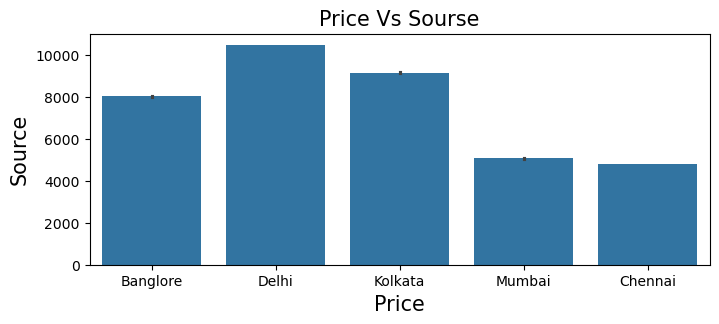

In [97]:
plt.figure(figsize=(8,3))
sns.barplot(x='Source',y='Price',orient="v",ci=12,data=data.sort_values('Price',ascending=False))  
plt.title("Price Vs Sourse",fontsize=15)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Source",fontsize=15)

In [98]:
# Delhi has highest price whereas chennai has minimum price for the flights 

<Axes: title={'center': 'Price Vs Destination'}, xlabel='Destination', ylabel='Price'>

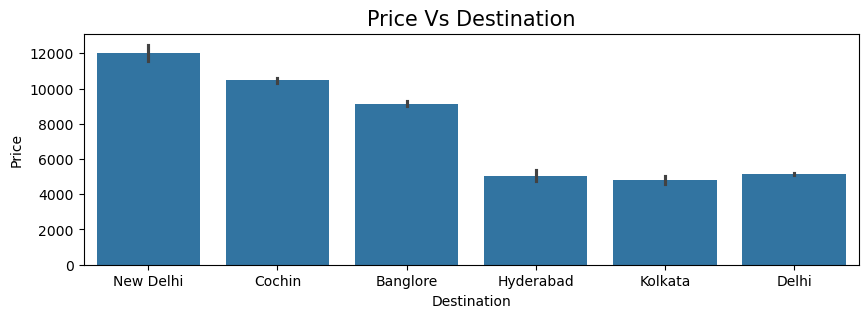

In [116]:
plt.figure(figsize=(10,3))
plt.title("Price Vs Destination",fontsize=15)
sns.barplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False))

In [117]:
# For New delhi destination has highest price whereas Kolkata has lowest price 

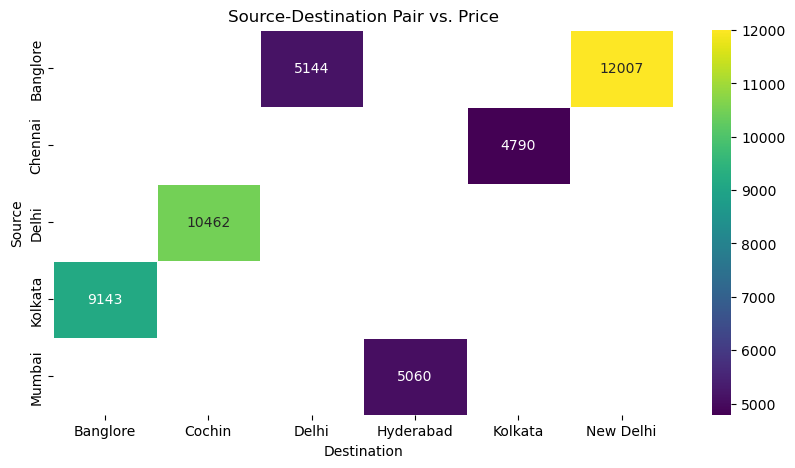

In [101]:
plt.figure(figsize=(10, 5))
heatmap_data = data.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Source-Destination Pair vs. Price')
plt.show()

In [102]:
# As we can see that from chennai to kolkata has lowest price 
# Bangalore to New delhi has highest price

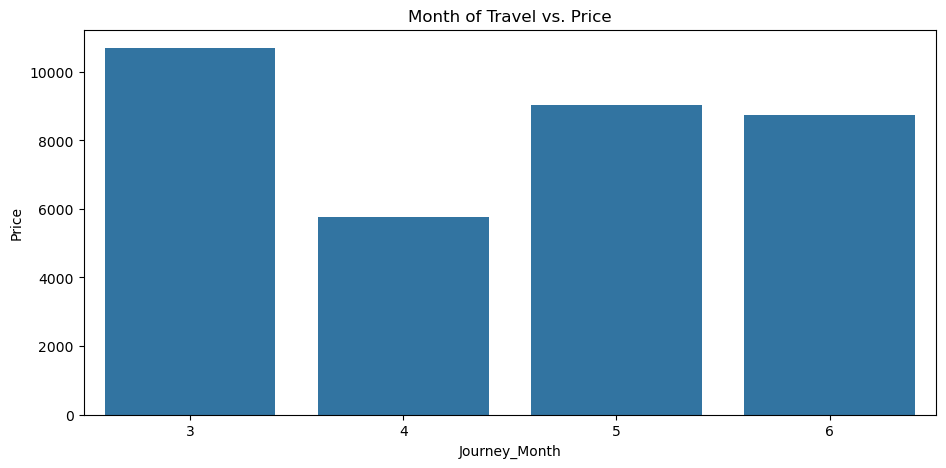

In [104]:
plt.figure(figsize=(11, 5))
sns.barplot(x='Journey_Month', y='Price', data=data, estimator='mean', ci=None)
plt.title('Month of Travel vs. Price')
plt.show()

In [105]:
data['Journey_Month'].unique()

array([3, 5, 6, 4])

In [108]:
# As we can see Flights are running only for march,april,may,june
# Maximum price are in March month whereas minimum price are in April Month

# Feature Engineering

**ENCODING THE CATAGORICAL DATA INTO NUMERICAL DATA**

In [118]:
#Categorical: [Airline, Source, Destination, Route, Additional_Info]
#Numerical: [Total_Stops, Price, Journey_Day, Journey_Month, Dep_Hour, Dep_Mins, Arrival_Hour, Arrival_Mins, Duration_Hours, Duration_Mins]

In [119]:
# We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
# Nominal data --> data are not in any order --> OneHotEncoder is used in this case
# Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [120]:
#Fetching Categorical Data
cat_col=[col for col in data.columns if data[col].dtype=='O'] #-->Object-"o"
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [121]:
#Continues feature of of my Data
cont_col=[col for col in data.columns if data[col].dtype!='O']
cont_col

['Total_Stops',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Mins',
 'Arrival_Hour',
 'Arrival_Mins',
 'Duration_Hours',
 'Duration_Mins']

In [122]:
#getting all the continuous data
continuous=data[cont_col]
continuous.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [123]:
#getting all the categorical data
categorical=data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [124]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [125]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [126]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [127]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data=pd.concat([categorical,continuous,Airline,Source,Destination],axis=1)
data.head()

,Airline,Source,Destination,Route,Additional_Info,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,0,3897,24,3,22,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,2,7662,1,5,5,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,2,13882,9,6,9,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,1,6218,12,5,18,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,1,13302,1,3,16,...,False,False,False,False,False,False,False,False,False,True


# Feature Selection

In [128]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route because total_Stops are also giving same information
# we can delete Airline,Source and destination because we have done encoding of all of them.
data.drop('Airline',axis=1,inplace=True)
data.drop('Source',axis=1,inplace=True)
data.drop('Destination',axis=1,inplace=True)
data.drop('Route',axis=1,inplace=True)
data.drop('Additional_Info',axis=1,inplace=True)

In [129]:
data.head(3)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False


In [130]:
data.shape

(10462, 30)

In [131]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [132]:
pd.set_option('display.max_columns',30) #display 30 col

In [133]:
data.head(3)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


**HANDLING OUTLIERS**

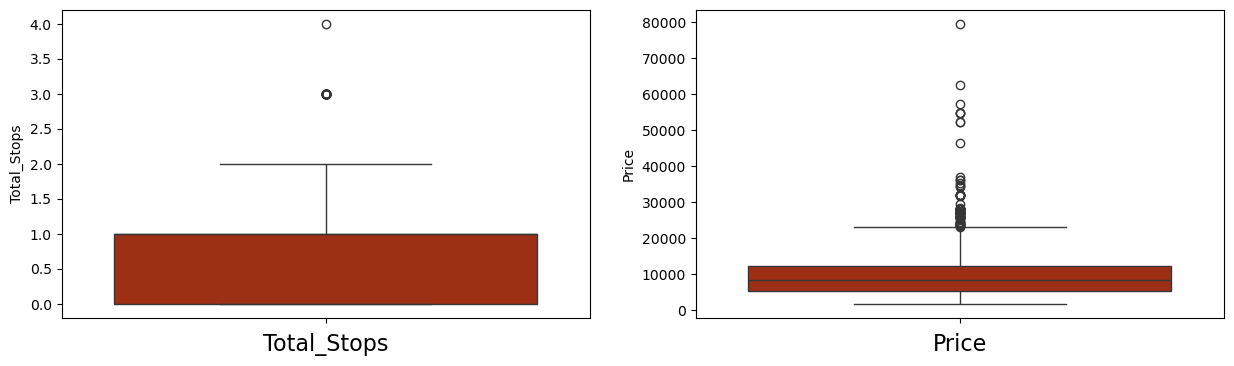

In [134]:
plt.figure(figsize=(15,4), facecolor ='white')
plt_num = 1
for i in continuous:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(data[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

In [135]:
# As we can see total_stops column doesn't has much outliers but price column contains lots of outliers, so we have to deal with them

In [136]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

<Axes: xlabel='Price'>

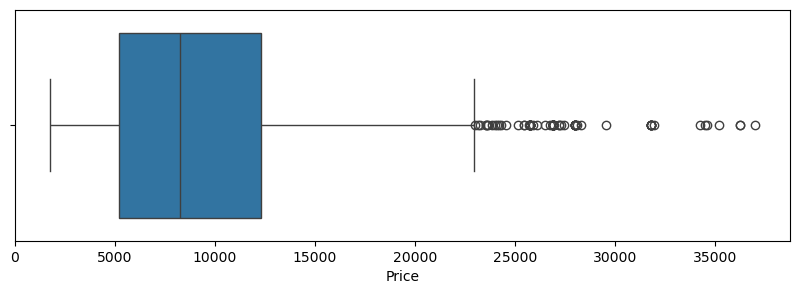

In [138]:
plt.figure(figsize=(10,3))
sns.boxplot(x=data['Price'])

In [139]:
data['Price']=np.where(data['Price']>=30000,data['Price'].median(),data['Price'])

<Axes: xlabel='Price'>

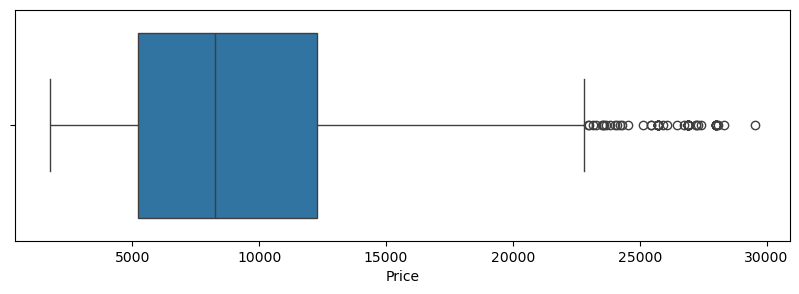

In [140]:
plt.figure(figsize=(10,3))
sns.boxplot(x=data['Price'])

In [141]:
# Hence we have cleared almost outliers of price column

**CORRELATION**

In [142]:
data.corr()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,0.638083,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.730156,-0.150253,0.272543,-0.057547,-0.294993,0.197439,0.019256,0.134335,0.010555,-0.273128,0.002926,-0.116775,-0.020571,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170
Price,0.638083,1.000000,-0.152000,-0.096425,-0.000548,-0.037640,0.042679,-0.092830,0.547313,-0.139121,0.059368,-0.098787,-0.376118,0.439452,-0.003806,0.155923,0.020283,-0.312087,-0.010944,-0.058428,0.000054,-0.188192,0.288287,0.026598,-0.241845,0.288287,-0.328451,-0.241845,-0.188192,0.172576
Journey_Day,-0.018937,-0.152000,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244,-0.031830,-0.002415,0.009730,-0.023679,-0.031960,0.044667,0.031397,0.023608,-0.008618,-0.012727,-0.020262,0.007745,0.095882,-0.057415,-0.012759,0.095882,0.004676,-0.012759,0.007745,-0.075976
Journey_Month,0.039003,-0.096425,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325,-0.045780,-0.003707,-0.042712,0.049903,-0.035024,0.056534,-0.051571,-0.008800,-0.014295,-0.015464,-0.019911,0.006898,0.130845,0.091726,-0.038187,0.130845,0.093871,-0.038187,0.006898,-0.452364
Dep_Hour,-0.067523,-0.000548,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843,-0.020731,-0.016309,-0.022254,0.120596,-0.007579,-0.151549,-0.029004,-0.010460,0.000890,0.024881,-0.003387,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,0.010428,-0.016968,-0.014639,-0.022008
Dep_Mins,-0.002695,-0.037640,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269,-0.043883,0.077403,-0.014346,0.022596,0.009245,-0.110297,-0.004653,0.093068,-0.010084,-0.078720,-0.011466,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.003314,0.038091,0.067710,0.107839
Arrival_Hour,0.051476,0.042679,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687,0.083394,0.017962,-0.075624,-0.015703,-0.014750,0.066751,0.013441,-0.093641,0.003726,0.068423,0.000689,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.033334,-0.035406,-0.016056,-0.003671
Arrival_Mins,-0.107099,-0.092830,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176,0.064743,0.097252,0.034447,-0.058805,0.005224,-0.169417,-0.001860,0.012123,-0.002785,0.070001,0.000286,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.095356,0.081318,-0.031050,0.019837
Duration_Hours,0.730156,0.547313,-0.029382,0.006410,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999,0.260713,-0.092784,-0.341076,0.299088,-0.011512,0.001100,-0.001406,-0.262374,-0.008200,-0.014727,-0.016226,-0.186251,0.280555,0.140774,-0.232258,0.280555,-0.345514,-0.232258,-0.186251,0.015801
Duration_Mins,-0.150253,-0.139121,-0.009244,-0.046325,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000,-0.026412,0.069148,0.122809,-0.096568,-0.002191,-0.118164,-0.006709,0.042655,-0.007652,0.043815,0.005141,-0.098949,-0.163515,0.018156,-0.017203,-0.163515,0.224232,-0.017203,-0.098949,0.078637


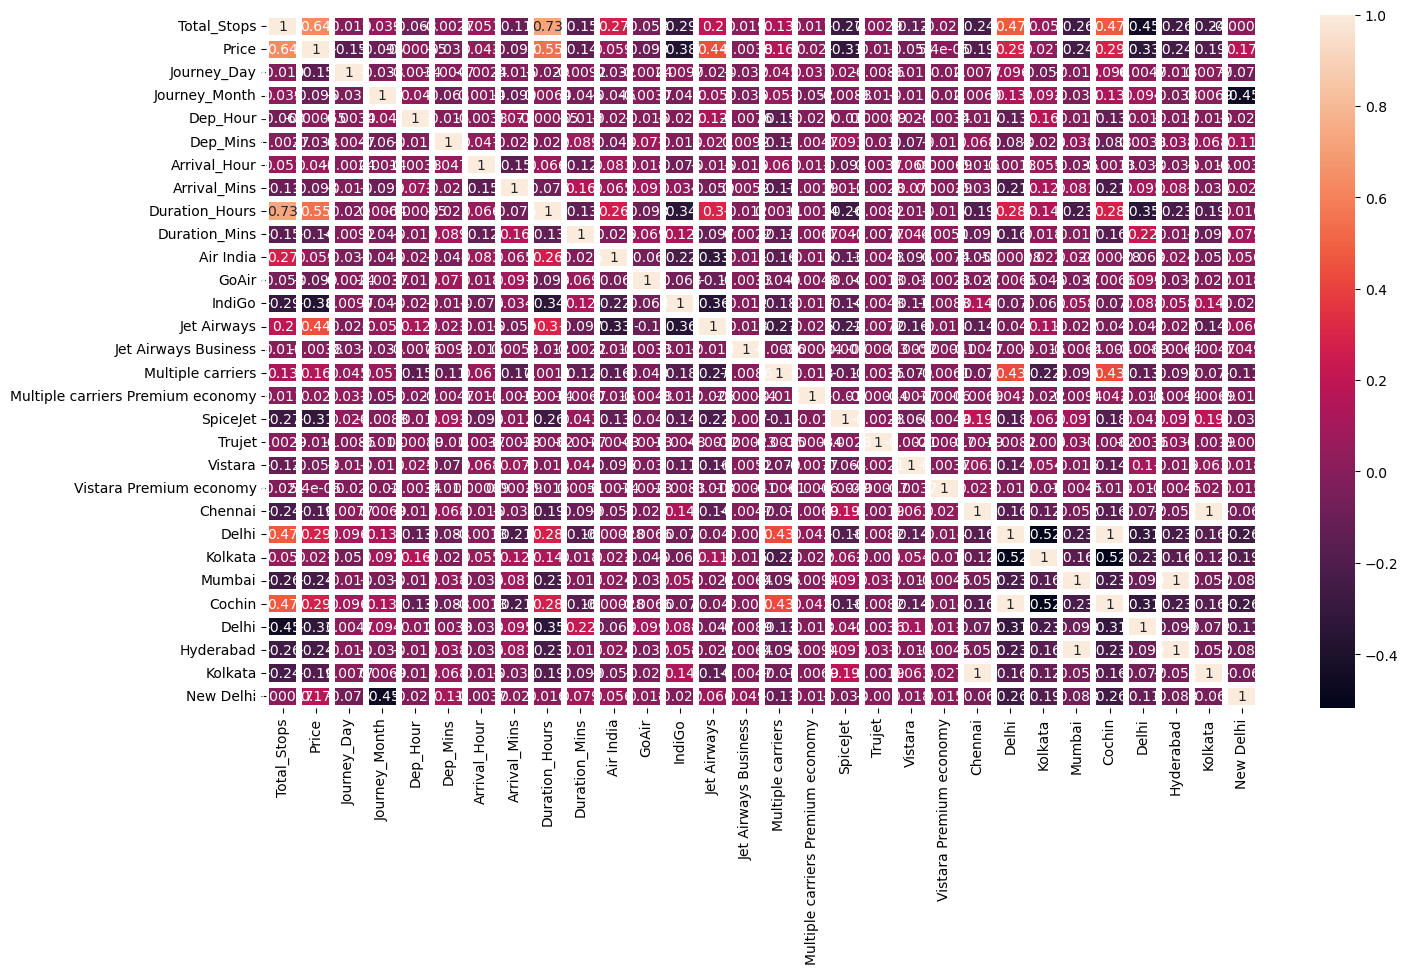

In [143]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True,linewidths=3)
plt.show()

# Model Creation

In [144]:
# separate independent & dependent data

In [145]:
X=data.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Mins,Duration_Hours,Duration_Mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [146]:
y=data['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10462, dtype: float64

In [147]:
print("Shape of X=",X.shape)
print("Shape of y=",y.shape)

Shape of X= (10462, 29)
Shape of y= (10462,)


In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [149]:
print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (8369, 29)
Shape of X_test= (2093, 29)
Shape of y_train= (8369,)
Shape of y_test= (2093,)


In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [151]:
sc.fit(X_train)
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [152]:
X_train

array([[-1.21632856,  0.88644015, -0.61057035, ..., -0.26340863,
        -0.19114663, -0.30493739],
       [ 0.29017636,  1.59403093,  1.10876453, ..., -0.26340863,
        -0.19114663, -0.30493739],
       [ 0.29017636, -0.8825368 ,  1.10876453, ..., -0.26340863,
        -0.19114663, -0.30493739],
       ...,
       [ 1.79668128,  0.53264476,  0.24909709, ..., -0.26340863,
        -0.19114663, -0.30493739],
       [-1.21632856, -0.8825368 , -1.47023779, ..., -0.26340863,
         5.23158595, -0.30493739],
       [ 0.29017636, -1.47219578, -0.61057035, ..., -0.26340863,
        -0.19114663, -0.30493739]])

# Model Building

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**LINEAR REGRESSION**

In [260]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error :
Mean absolute error : 1863.4637206099203
Mean squared error : 6472790.447334927
Root Mean squared error : 2544.167928289115
 R2 Score :
63.851450208232265


In [261]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6182886511294732


**RANDOM FOREST REGRESSOR**

In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [264]:
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 1166.7687899290543
Mean squared error : 3405113.379163999
Root Mean squared error : 1845.2949301301403
R2 Score of Random Forest Regressor :
80.98348594244933


In [265]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X, y, cv=2)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.806484195664686


**DECISION TREE REGRESSOR**

In [269]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [270]:
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 1397.5268663056174
Mean squared error : 5883608.868402887
Root Mean squared error : 2425.615152575298
R2 Score of Decision Tree Regressor :
67.14184865627507


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X, y, cv=10)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

# Conclusion

1. Random Forest models proved to be the most effective for flight fare prediction, achieving higher accuracy (80%)and generalization.
2. Feature engineering, such as encoding categorical variables and creating time-based features, played a critical role in improving model performance.
3. The analysis highlighted the dynamic nature of flight fares, emphasizing the importance of real-time data updates for practical applications.


# Challenges Faced with Reasons

**Missing Values:**
 Route and Total Stops, had missing values.
Reason: Incomplete records or unrecorded entries during data collection.

**Categorical Variables:**

Features like Airline, Source, Destination, Route,Additional information and Total Stops were categorical and required encoding for model training.
Features such as Duration were inconsistently formatted (e.g., "5h 30m" vs. "30m").
Reason: Machine learning algorithms work with numerical data, not categorical labels, Lack of standardization in data representation.

**Date and Time Formats**
Features like Arrival Time, Duration, Departure time, Date of journey were in date and time formate, we had to perform lot of encoding to convert into int datatype.
Reason: Maching learning algorithms does not accept date and time formate.

**Outliers in Price:**
Flight fares exhibited extreme values, impacting model training.
Reason: Outliers might result from rare routes, business-class fares, or errors.

**High Cardinality in Route:**

The Route column contained unique combinations, creating high-dimensional data.
Reason: Numerous possible combinations of stops between source and destination.